<span style="font-family: Arial; font-weight:bold;font-size:3.0em;color:#0e92ea"> Project 2: Business Statistics: Axis Insurance

# Content: 
- <a href = #link4> Question 1: Exploratory Data Analysis</a>
- <a href = #link5>Univariate Analysis</a>
- <a href = #link6>Bivariate Analysis</a>
- <a href = #link7>Question 2: Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?</a>
- <a href = #link8>Question 3: Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.</a>
- <a href = #link9>Question 4: Is the proportion of smokers significantly different across different regions?</a>
- <a href = #link10>Question 5: Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.</a>

##### Considered a significance level of 0.05 for all tests

# <a name='link4'>**Question 1: Exploratory Data Analysis**</a>

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats 

### Importing the data set and checking the data

In [2]:
axis_insurance=pd.read_csv('AxisInsurance.csv')
axis_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
axis_insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
print("The data frame has {} rows and {} columns".format(axis_insurance.shape[0],axis_insurance.shape[1]))

The data frame has 1338 rows and 7 columns


In [5]:
axis_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
axis_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Checking for missing values

In [31]:
axis_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

In [33]:
axis_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 









# <a name='link5'>**Univariate Analysis**</a>

In [11]:
#Defining a function to ease the process
def diff_plots(axis_insurance):
    fig, axes =plt.subplots(1,3,figsize=(20, 5))
    Name=axis_insurance.name.upper()
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.distplot(axis_insurance,kde=True,color='Blue',ax=axes[0])
    axes[0].axvline(axis_insurance.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(axis_insurance.median(), color='r', linestyle='solid', linewidth=2)
    axes[0].axvline(axis_insurance.mode()[0],color='g',linestyle='dashed',linewidth=2)
    axes[0].legend({'Mean':axis_insurance.mean(),'Median':axis_insurance.median(),'Mode':axis_insurance.mode()})
    sns.boxplot(x=axis_insurance,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(axis_insurance,ax=axes[2],showmeans=True)

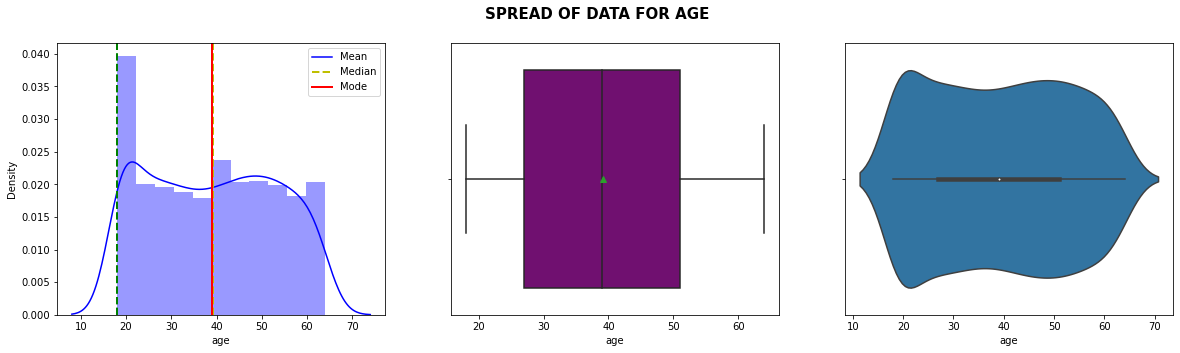

In [35]:
diff_plots(axis_insurance.age);

#### 
* From above graph we can see that age is quiet normally distributed
* There are no significant outliers in the data set for age, whereas it varies from the age of 25+ up to a little above 50.
# 
# 








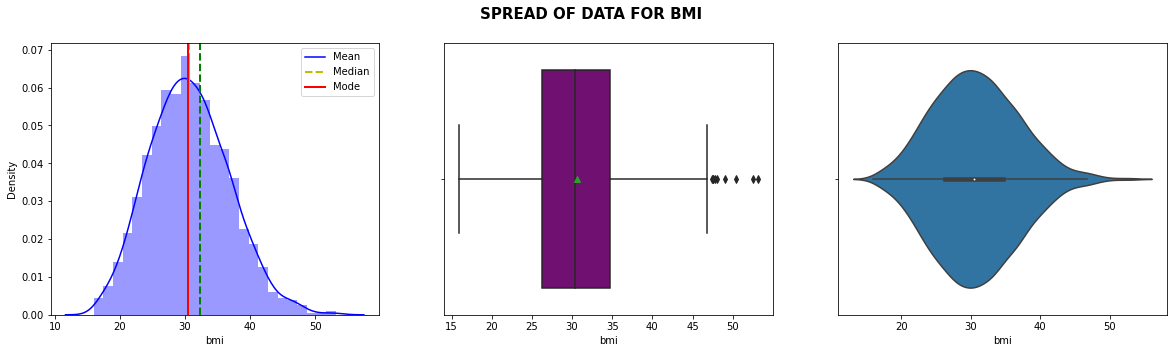

In [135]:
diff_plots(axis_insurance.bmi);

In [140]:
from scipy.stats import norm
mu = axis_insurance["bmi"].mean()
sigma = axis_insurance["bmi"].std()
fit_customers = norm.cdf(25, mu, sigma)
print("The probability that a customer is not overwieght and fit is", round(fit_customers, 4))


The probability that a customer is not overwieght and fit is 0.1765


* BMI is having a normal distribution
* We can also see that there are many outliers
* From the BMI we understand that most of the customers are not fit and the non owerweight customers are less than 20%.

# 
# 




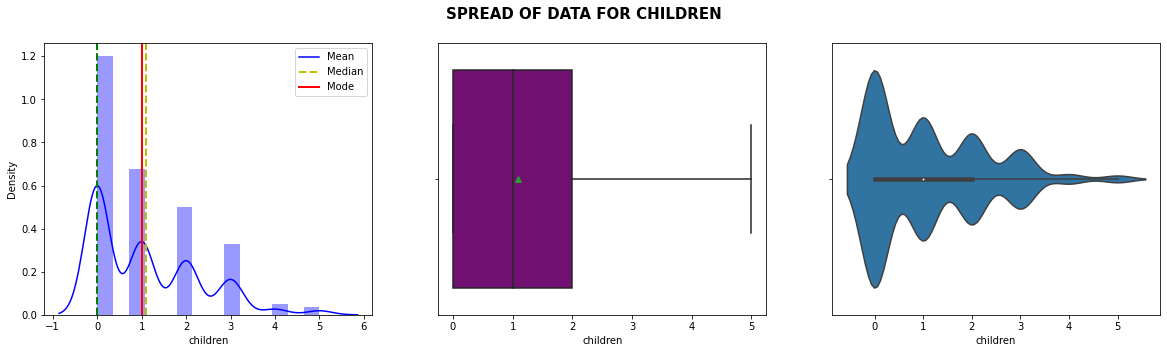

In [36]:
diff_plots(axis_insurance.children);

#### 
* From the above graph we see tha the distrbuition is right skewed
* And there are no outliers in the data set for children
# 
# 

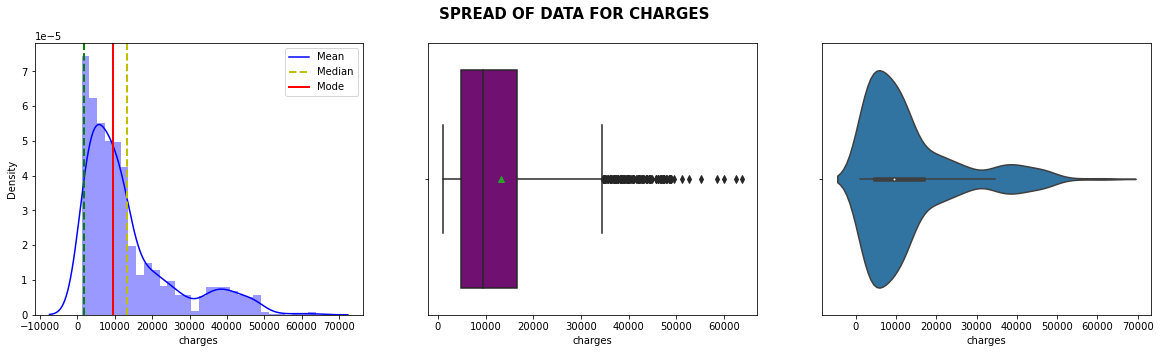

In [15]:
diff_plots(axis_insurance.charges);

#### 
* We see huge number of outliers for the data set of charges
* The distribution of charges is right skewed (mean>median)
# 
# 


In [16]:
axis_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

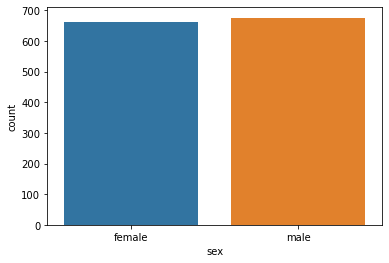

In [18]:
sns.countplot(axis_insurance['sex']);

In [22]:
#number of smokers vs non-smokers
axis_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

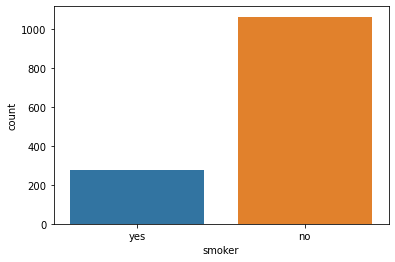

In [37]:
sns.countplot(axis_insurance['smoker']);

In [24]:
#display the count of children
axis_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

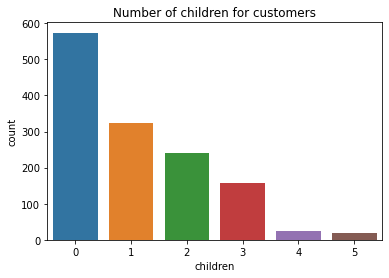

In [86]:
sns.countplot(axis_insurance['children']);
plt.title('Number of children for customers');

#### So from above we can see that 18 people have 5 children and 574 people have 0 children
# 

In [40]:
axis_insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
axis_insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

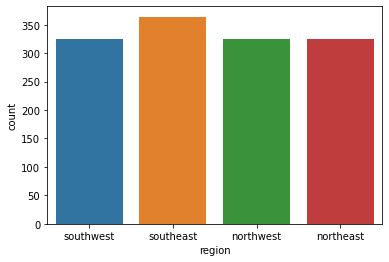

In [43]:
sns.countplot(axis_insurance['region']);

#### The count of people with how many children they are having and they are smoker or not

In [45]:
pd.crosstab(axis_insurance['children'],axis_insurance['smoker'])

smoker,no,yes
children,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


#### Graphical representation of the count of people with how many children they are having and they are smoker or not

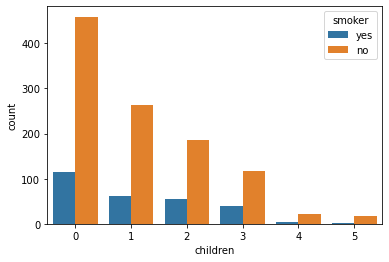

In [36]:
sns.countplot(axis_insurance['children'],hue=axis_insurance['smoker']);

#### We can see that 459 non smoker people have 0 children and 115 smoker people have 0 children. 17 non smoker people have 5 children and 1 smoker people have 5 children
# 

#### Skewness of age,bmi and charges

In [46]:
pd.DataFrame([stats.skew(axis_insurance['age']),stats.skew(axis_insurance['bmi']),stats.skew(axis_insurance['charges']),stats.skew(axis_insurance['children'])],index=['age','bmi','charges','children'],columns=['skewness'])

,skewness
age,0.055610
bmi,0.283729
charges,1.514180
children,0.937328


#### The skewness of charges and children are high and age has less skewness
# 

### Graphical relation between differnt attributes, sorting in terms of the sex:

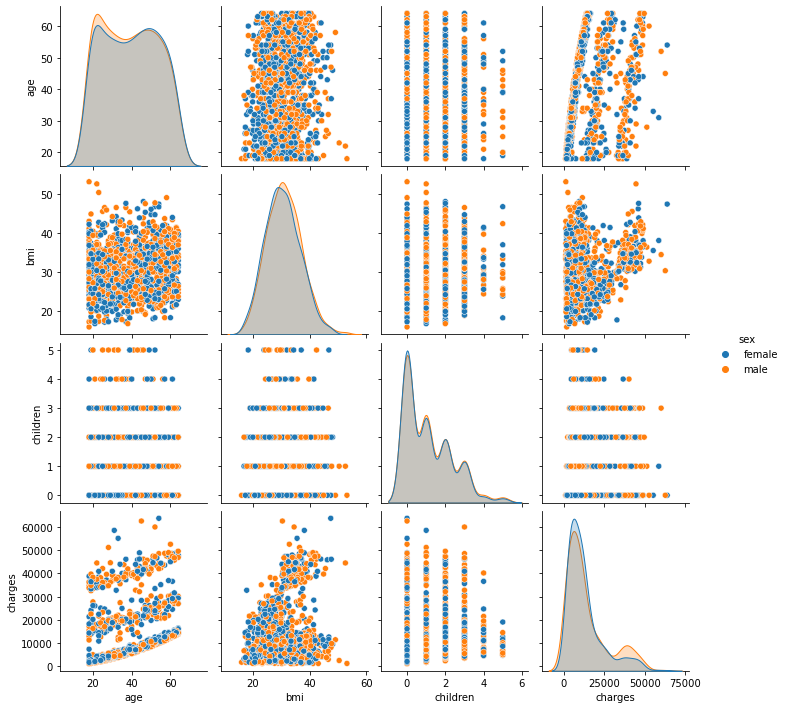

In [47]:
sns.pairplot(axis_insurance,hue='sex');

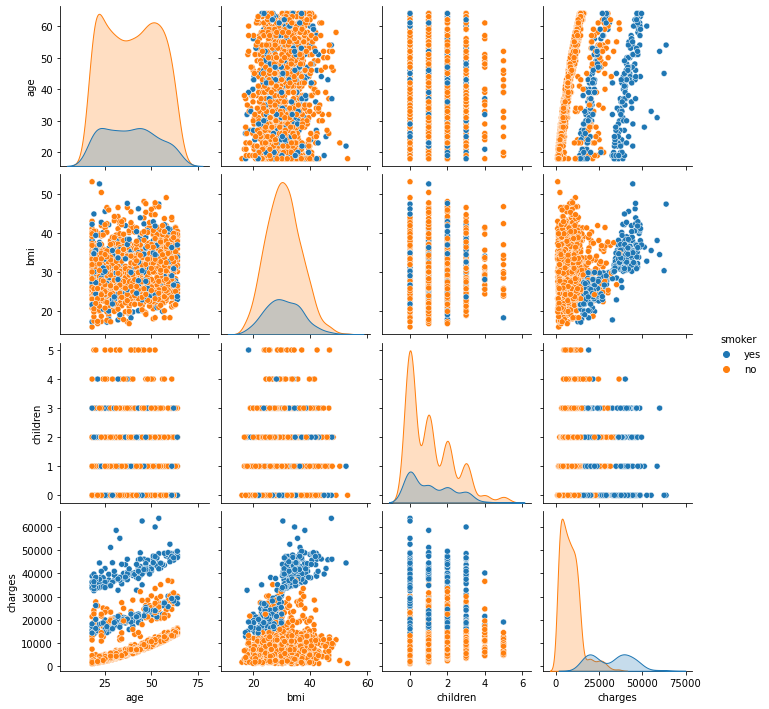

In [48]:
#Graphical relation between differnt attributes, sorting in terms of being a smoker:
sns.pairplot(axis_insurance,hue='smoker');

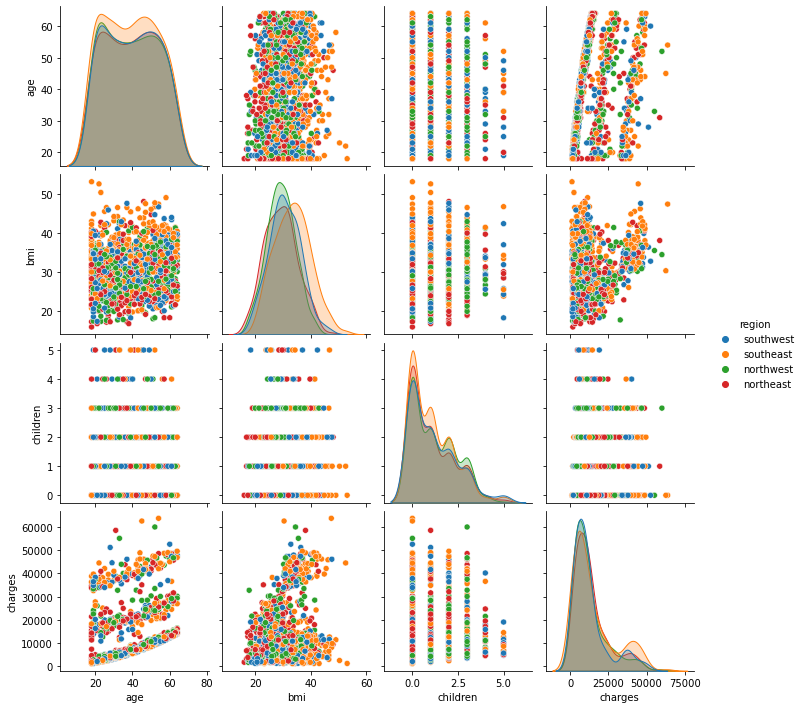

In [8]:
#Graphical relation between differnt attributes, sorting in terms of the region:
sns.pairplot(axis_insurance,hue='region');

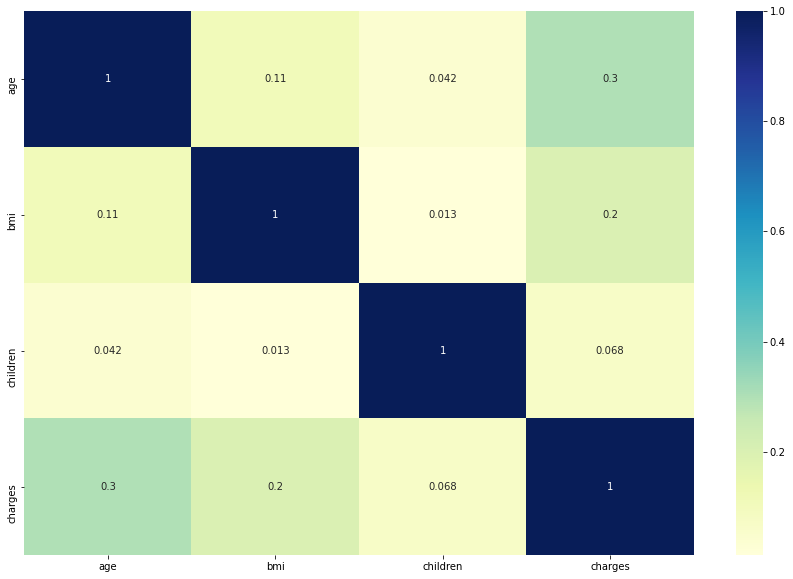

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(axis_insurance.corr(),annot=True, cmap='YlGnBu');

#### We are not able to find any strong correlation between the different variables in the data set

# <a name='link6'>**Bivariate Analysis**</a>

In [63]:
axis_insurance.groupby('sex')['charges'].sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

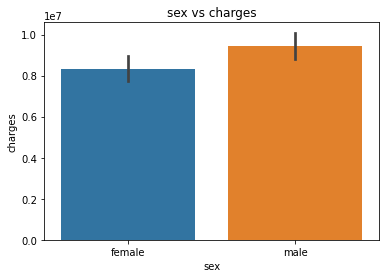

In [66]:
sns.barplot(x='sex', y='charges', data=axis_insurance, estimator=sum);
plt.title("sex vs charges");

#### We see that the claims in males are slightly more than females

In [67]:
axis_insurance.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

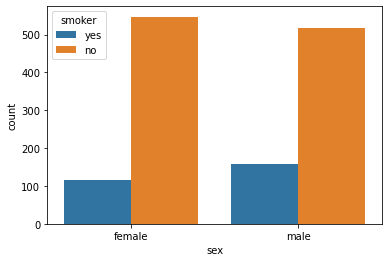

In [70]:
sns.countplot(data=axis_insurance,x='sex',hue='smoker');

#### We can see that the highest number of non smokers are in females and the highest number of smokers are in males. 

In [71]:
axis_insurance.groupby('region')['smoker'].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

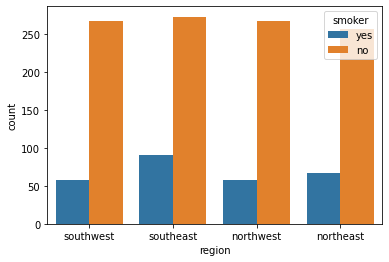

In [72]:
sns.countplot(data=axis_insurance,x='region',hue='smoker');

* we can see that the number of smokers in different regions is almost the same with southeast have a little higher proportion than others
* Even the number of non smokers in different region are almost the same

In [62]:
axis_insurance.groupby('smoker')['age'].mean() 

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

* There is no significant age group for smokers and non smokers while the average ages are shown as above

In [83]:
axis_insurance.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64


# <a name='link7'>**Question 2: Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?**</a>

In [89]:
#Null Hypothesis--> H0 = "medical claims made by smokers is greater"
#Alternate hypothesis--> H1 = "medical claims made by smokers is not greater" 

x = np.array(axis_insurance[axis_insurance['smoker'] == 'yes']['charges'])
y = np.array(axis_insurance[axis_insurance['smoker'] == 'no']['charges'])

#independent T-test
t,p_value = stats.ttest_ind(x,y,axis =0)
print("p_value is",p_value)
if p_value <0.05:
    print("Medical claims made by smokers is not greater (reject H0)")
else:
    print("Medical claims made by smokers is greater(accept H0)")

p_value is 8.271435842177219e-283
Medical claims made by smokers is not greater (reject H0)


In [97]:
axis_insurance.groupby('smoker')['charges'].sum()

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

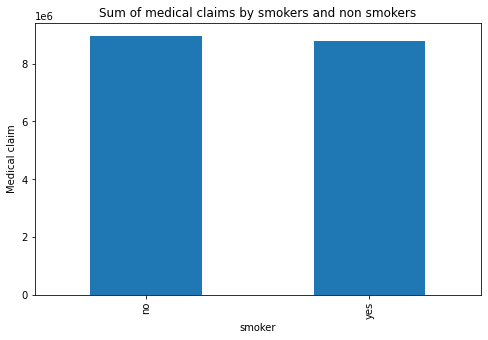

In [105]:
axis_insurance.groupby('smoker')['charges'].sum().plot(x="smoker",y="charges",kind='bar',figsize=(8,5),title='Sum of medical claims by smokers and non smokers',ylabel='Medical claim');


##### We prove that the medical claims by non smokers are greater and hence our null hypothesis that the medical claims made by smoker is greater is rejected

# <a name='link8'>**Question 3: Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.**</a>

In [109]:
#Null Hypothesis--> H0 = "There is no difference in BMI between females and males"
    #Alternate hypothesis--> H1 = "There is difference in BMI between females and males" 

x = np.array(axis_insurance[axis_insurance['sex'] == 'male']['bmi'])
y = np.array(axis_insurance[axis_insurance['sex'] == 'female']['bmi'])

#performing an independent T-test
t,p_value = stats.ttest_ind(x,y,axis =0)
print("p_value is",p_value)
if p_value <0.05:
    print("There is difference in bmi between females and males(reject H0)")
else:
    print("There is no difference in bmi between females and males (accept H0)")



p_value is 0.08997637178984934
There is no difference in bmi between females and males (accept H0)


In [110]:
axis_insurance.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

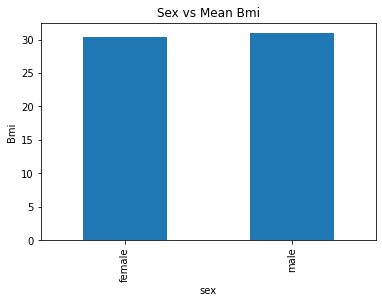

In [141]:
axis_insurance.groupby('sex')['bmi'].mean().plot(x='sex',y='bmi',kind='bar',ylabel='Bmi');
plt.title('Sex vs Mean Bmi');
                                                                                                         

##### The average BMI for both Genders are almost the same, hence we have proven both statistically and graphically that gender does not have an effect on the BMI

# <a name='link9'>**Question 4: Is the proportion of smokers significantly different across different regions?**</a>

In [114]:
crosstab=pd.crosstab(axis_insurance['region'],axis_insurance['smoker'])
crosstab

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [ ]:
# Chi_square test to check if smoking habits are different for different regions

In [89]:
Ho = "There is no difference in proportion of smokers across different region"   # Stating the Null Hypothesis
Ha = "There is difference in proportion of smokers across different region"   # Stating the Alternate Hypothesis


chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')



There is no difference in proportion of smokers across different region as the p_value (0.062) > 0.05


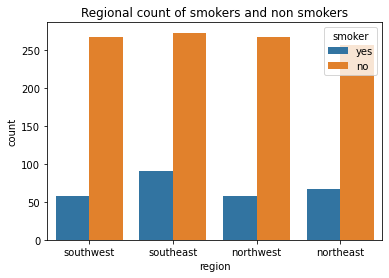

In [126]:
sns.countplot(data=axis_insurance,x='region',hue='smoker');
plt.title('Regional count of smokers and non smokers');

##### We have proved both statistically and graphically that there is no significant difference in the number of smokers across different regions


# <a name='link10'>**Question 5: Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.**</a>

In [58]:
#Null Hypothesis--> H0 = "The distribution of bmi across women with no children,one child and two children is not same"
#Alternate hypothesis--> H1 = "The distribution of bmi across women with no children,one child and two children is same"

#make the data frame of females having children less than or equal to 2

In [57]:
df = axis_insurance[(axis_insurance['children']<=2) & (axis_insurance['sex']=='female')]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [108]:
stats.pearsonr(df['bmi'], df['children'])

(0.01101278435145415, 0.7937600294540473)

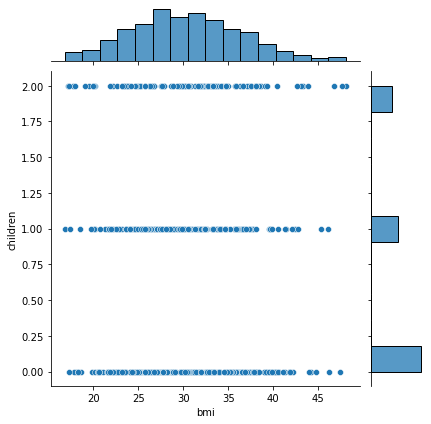

In [134]:
jp = sns.jointplot(df['bmi'],df['children']);

plt.show()

##### We can see that p_value is 0.79 which means that the distribution of bmi across women with no children,one child and two children is same and we reject H0(Null Hypothesis)